In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

from PIL import Image, ImageOps
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2693 - acc: 0.9188 - val_loss: 0.0616 - val_acc: 0.9800
Epoch 2/12
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0919 - acc: 0.9729 - val_loss: 0.0428 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0687 - acc: 0.9790 - val_loss: 0.0343 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.0280 - val_acc: 0.9902
Epoch 5/12
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0485 - acc: 0.9853 - val_loss: 0.0285 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0438 - acc: 0.9869 - val_loss: 0.0288 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0374 - acc: 0.9885 - val_loss: 0.0264 - val_acc

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

In [11]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025488451318489386
Test accuracy: 0.992


### Saving the model

In [12]:
model.save('cnn_model.h5')

### Loading the model

In [13]:
loaded_model = load_model('cnn_model.h5')

### Prediction

In [14]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

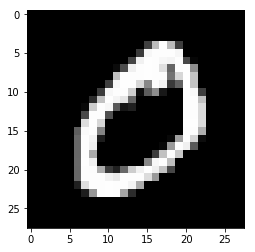

In [15]:
plt.imshow(x_train[1].reshape(28,28), cmap='Greys_r')
plt.show()

In [16]:
img = Image.open('four_test.png').convert('L')

In [17]:
img

In [18]:
data = np.asarray(img, dtype='int32')

In [19]:
inverted_img = ImageOps.invert(img)

In [20]:
inverted_img

In [21]:
data = np.asarray(inverted_img, dtype='int32')

In [22]:
rescaled_data = (data/255).reshape(28,28)

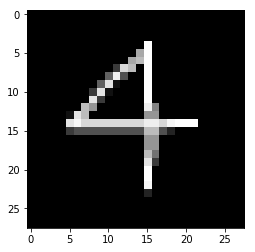

In [23]:
plt.imshow(rescaled_data, cmap='Greys_r')
plt.show()

In [24]:
loaded_model.predict_classes(rescaled_data.reshape((1, 28, 28, 1)))

array([4])

In [25]:
rescaled_data.sum()

46.12941176470588